In [1]:
#-----------------------------------Expanded Access-----------------------------------#
#importing all the essential library # from this line!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
#Patient Registries##
ea = pd.read_csv('ExpandedAccess_cleaned_final.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
ea.head()

,Unnamed: 0,nct_id,study_type,phase,start_month_year,primary_completion_month_year,has_dmc,overall_status,brief_title,why_stopped,...,lead_Sponsor,Agency_Class_Lead,lead_or_collaborator,subjects_affected,subjects_at_risk,responsible_party_type,enrollment_bins,minimum_age_bins,max_age_bins,stopped
0,34897,NCT04132882,Expanded Access,Not_Interventional,not_provided,not_provided,not_provided,Available,A Compassionate Use Program to Provide Access ...,not stopped/ not stated,...,TRPHARM,Industry,collaborator$$lead,not_provided,not_provided,Sponsor,not_provided,Children,Youth,not stopped/ not stated
1,107579,NCT03206931,Expanded Access,Not_Interventional,not_provided,not_provided,not_provided,Available,Expanded Access to Provide Selitrectinib for t...,not stopped/ not stated,...,Bayer,Industry,lead,not_provided,not_provided,Sponsor,not_provided,Children,no_criteria,not stopped/ not stated
2,163089,NCT01461304,Expanded Access,Not_Interventional,not_provided,not_provided,not_provided,No longer available,Compassionate Use of Triheptanoin (C7) for Inh...,not stopped/ not stated,...,"Jerry Vockley, MD, PhD",Other,collaborator$$lead,not_provided,not_provided,Sponsor-Investigator,not_provided,Children,no_criteria,not stopped/ not stated
3,169406,NCT02431715,Expanded Access,Not_Interventional,not_provided,not_provided,not_provided,Available,18F-FDOPA PET in Neuroendocrine Tumours,not stopped/ not stated,...,British Columbia Cancer Agency,Other,lead,not_provided,not_provided,Sponsor,not_provided,Children,no_criteria,not stopped/ not stated
4,180234,NCT03145545,Expanded Access,Not_Interventional,not_provided,not_provided,not_provided,Available,Expanded Access Protocol Using Alpha/Beta T an...,not stopped/ not stated,...,Children's Hospital of Philadelphia,Other,lead,not_provided,not_provided,Principal Investigator,not_provided,Children,no_criteria,not stopped/ not stated


In [2]:
del ea['nct_id']
ea.dtypes

Unnamed: 0                       object
study_type                       object
phase                            object
start_month_year                 object
primary_completion_month_year    object
has_dmc                          object
overall_status                   object
brief_title                      object
why_stopped                      object
enrollment_type                  object
study_first_submitted_date       object
number_of_facilities_bins        object
number_of_arms                   object
number_of_groups                 object
country_name                     object
condition_name                   object
actual_duration_bins             object
were_results_reported            object
has_single_facility              object
allocation                       object
masking                          object
intervention_model               object
primary_purpose                  object
observational_model              object
gender                           object


In [3]:
ea.describe(include='all')

,Unnamed: 0,study_type,phase,start_month_year,primary_completion_month_year,has_dmc,overall_status,brief_title,why_stopped,enrollment_type,...,lead_Sponsor,Agency_Class_Lead,lead_or_collaborator,subjects_affected,subjects_at_risk,responsible_party_type,enrollment_bins,minimum_age_bins,max_age_bins,stopped
count,526,526,526,526,526,526,526,526,526,526,...,526,526,526,526,526,526,526,526,526,526
unique,526,1,1,50,36,3,4,526,1,1,...,328,4,2,1,1,4,1,3,6,1
top,1366,Expanded Access,Not_Interventional,not_provided,not_provided,not_provided,No longer available,Pre-Approval Access for Administration of Dara...,not stopped/ not stated,not_provided,...,Novartis Pharmaceuticals,Industry,lead,not_provided,not_provided,Sponsor,not_provided,Youth,no_criteria,not stopped/ not stated
freq,1,526,526,476,485,506,230,1,526,526,...,26,340,416,526,526,400,526,299,383,526


In [4]:
#Getting all the categorical columns except the overall status
categorical_columns4 = ea.select_dtypes(exclude = 'number').drop('overall_status', axis = 1).columns
ea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     526 non-null    object
 1   study_type                     526 non-null    object
 2   phase                          526 non-null    object
 3   start_month_year               526 non-null    object
 4   primary_completion_month_year  526 non-null    object
 5   has_dmc                        526 non-null    object
 6   overall_status                 526 non-null    object
 7   brief_title                    526 non-null    object
 8   why_stopped                    526 non-null    object
 9   enrollment_type                526 non-null    object
 10  study_first_submitted_date     526 non-null    object
 11  number_of_facilities_bins      526 non-null    object
 12  number_of_arms                 526 non-null    object
 13  numbe

In [5]:
pd.crosstab(ea['overall_status'], ea['lead_Sponsor'])

lead_Sponsor,ACADIA Pharmaceuticals Inc.,AIM ImmunoTech Inc.,"AVEO Pharmaceuticals, Inc.","Aadi, LLC",AbbVie,Abbott,Abbott Medical Devices,Abiomed Inc.,"Adaptive Phage Therapeutics, Inc.",Advanced Accelerator Applications,...,ViiV Healthcare,W. Dalton Dietrich,Wake Forest University Health Sciences,Washington University School of Medicine,"Wendell Yap, MD","Xcovery Holding Company, LLC",Yehudith Assouline-Dayan,Zhejiang University,Zimmer Biomet,"Zogenix, Inc."
overall_status,,,,,,,,,,,,,,,,,,,,,
Approved for marketing,1,0,0,0,1,2,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
Available,0,1,0,1,5,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
No longer available,0,0,1,0,1,0,2,1,0,0,...,3,2,0,1,1,0,1,1,1,0
Temporarily not available,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Import the function
from scipy.stats import chi2_contingency
#Testing the relationship
chi_res = chi2_contingency(pd.crosstab(ea['overall_status'], ea['lead_Sponsor']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 1186.7477602557187, p-value: 6.218181794382372e-06


In [7]:
# Import the function
from scipy.stats import chi2_contingency

chi2_check = []

for i in categorical_columns4:
    if chi2_contingency(pd.crosstab(ea['overall_status'], ea[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns4, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                           Column                      Hypothesis
0                      Unnamed: 0  Fail to Reject Null Hypothesis
1                      study_type  Fail to Reject Null Hypothesis
2                           phase  Fail to Reject Null Hypothesis
3                start_month_year  Fail to Reject Null Hypothesis
4   primary_completion_month_year  Fail to Reject Null Hypothesis
5                         has_dmc          Reject Null Hypothesis
6                     brief_title  Fail to Reject Null Hypothesis
7                     why_stopped  Fail to Reject Null Hypothesis
8                 enrollment_type  Fail to Reject Null Hypothesis
9      study_first_submitted_date  Fail to Reject Null Hypothesis
10      number_of_facilities_bins          Reject Null Hypothesis
11                 number_of_arms  Fail to Reject Null Hypothesis
12               number_of_groups  Fail to Reject Null Hypothesis
13                   country_name  Fail to Reject Null Hypothesis
14        

In [6]:
property_dummies = pd.get_dummies(data = ea[['overall_status', 'lead_Sponsor']], columns = ['overall_status'])
property_dummies

,lead_Sponsor,overall_status_Approved for marketing,overall_status_Available,overall_status_No longer available,overall_status_Temporarily not available
0,Talaris Therapeutics Inc.,0,0,1,0
1,"Biotoxtech Co., Ltd",0,0,0,1
2,Fred Hutchinson Cancer Research Center,0,0,1,0
3,Novartis Pharmaceuticals,0,1,0,0
4,Pfizer,0,0,1,0
...,...,...,...,...,...
521,Incyte Corporation,0,1,0,0
522,Bristol-Myers Squibb,0,0,1,0
523,MaaT Pharma,0,1,0,0
524,Phoenix Children's Hospital,0,0,1,0


In [8]:
pd.crosstab(property_dummies['lead_Sponsor'], property_dummies['overall_status_Available'])

overall_status_Available,0,1
lead_Sponsor,,
ACADIA Pharmaceuticals Inc.,1,0
AIM ImmunoTech Inc.,0,1
"AVEO Pharmaceuticals, Inc.",1,0
"Aadi, LLC",0,1
AbbVie,2,5
...,...,...
"Xcovery Holding Company, LLC",0,1
Yehudith Assouline-Dayan,1,0
Zhejiang University,1,0


In [9]:
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(ea[i])
    bon_p_value = 0.05/ea[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(ea['overall_status'], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph
#res_chi_ph.to_csv("Capstone.ChiTest_PR.csv")

NameError: name 'res' is not defined

In [5]:
import pandas_profiling as pdp

ea.replace(to_replace ="$$",
                 value ="-")

,Unnamed: 0,nct_id,study_type,phase,start_month_year,primary_completion_month_year,has_dmc,overall_status,official_title,brief_title,...,keywords_name,enrollment,enrollment_index,enrollment_bins,minimum_age,minimum_age_years,minimum_age__years_int,minimum_age_bins,maximum_age,stopped
0,115,NCT02021266,Expanded Access,Not_Interventional,not_provided,not_provided,not_provided,No longer available,Single Patient Expanded Access Protocol: Phase...,Single Patient Expanded Access Protocol: Metab...,...,not_provided,not_provided,-1,not_provided,no_criteria,no_criteria Years,NaN,Children,no_criteria,not stopped/ not stated
1,160,NCT01889745,Expanded Access,Not_Interventional,not_provided,not_provided,TRUE,Temporarily not available,"A Phase I Clinical Study, Randomized, Single-b...","A Phase I Clinical Study of the Safety, Tolera...",...,not_provided,not_provided,-1,not_provided,20 Years,20 Years,NaN,Children,40 Years,not stopped/ not stated
2,340,NCT00547235,Expanded Access,Not_Interventional,Sep-07,Dec-12,not_provided,No longer available,Protocol For The Emergency Use Of Adoptive Imm...,Emergency Use of Adoptive Immunotherapy With C...,...,infection$$precancerous/nonmalignant condition,not_provided,-1,not_provided,no_criteria,no_criteria Years,NaN,Children,1 Year,not stopped/ not stated
3,766,NCT04745637,Expanded Access,Not_Interventional,not_provided,not_provided,not_provided,Available,Managed Access Program (MAP) to Provide Access...,"MAP to Provide Access to Ruxolitinib, for Pati...",...,Jakavi$$PET-MF$$PMF$$Post Essential Thrombocyt...,not_provided,-1,not_provided,12 Years,12 Years,NaN,Children,99 Years,not stopped/ not stated
4,1366,NCT00962260,Expanded Access,Not_Interventional,not_provided,not_provided,not_provided,No longer available,An Open-label Expanded Access Trial of Plant C...,Expanded Access Trial of Plant Expressed Recom...,...,anemia$$enzyme replacement therapy$$Gaucher di...,not_provided,-1,not_provided,18 Years,18 Years,NaN,Children,no_criteria,not stopped/ not stated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,266207,NCT03906357,Expanded Access,Not_Interventional,not_provided,not_provided,not_provided,Available,not_provided,Expanded Access of Pemigatinib to Treat a Sing...,...,not_provided,not_provided,-1,not_provided,no_criteria,no_criteria Years,NaN,Children,no_criteria,not stopped/ not stated
522,266845,NCT02475382,Expanded Access,Not_Interventional,not_provided,not_provided,not_provided,No longer available,Expanded Access Program With Nivolumab Monothe...,Expanded Access Program With Nivolumab Therapy...,...,not_provided,not_provided,-1,not_provided,18 Years,18 Years,NaN,Children,no_criteria,not stopped/ not stated
523,267535,NCT04768907,Expanded Access,Not_Interventional,not_provided,not_provided,not_provided,Available,not_provided,Expanded Access Program With MaaT013 in Steroi...,...,not_provided,not_provided,-1,not_provided,18 Years,18 Years,NaN,Children,no_criteria,not stopped/ not stated
524,268075,NCT00590915,Expanded Access,Not_Interventional,not_provided,not_provided,not_provided,No longer available,Erwinase Master Treatment Protocol,Erwinase Master Treatment Protocol,...,ALL,not_provided,-1,not_provided,no_criteria,no_criteria Years,NaN,Children,no_criteria,not stopped/ not stated


Text(0.5, 0, 'Frequency')

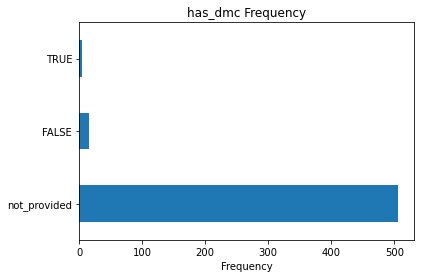

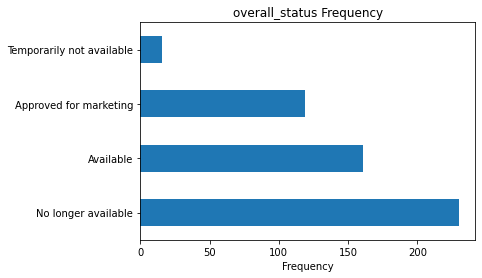

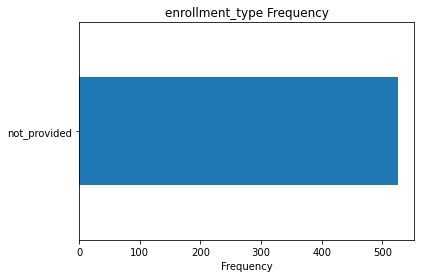

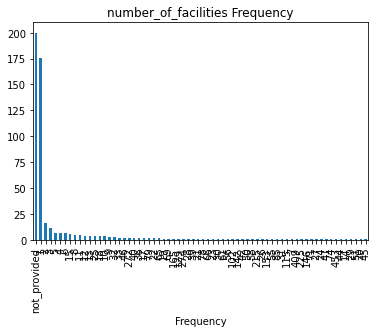

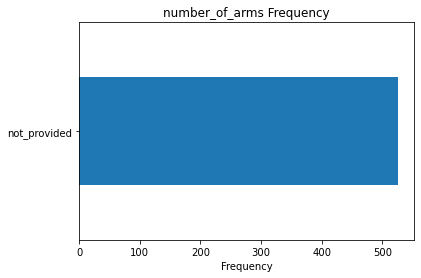

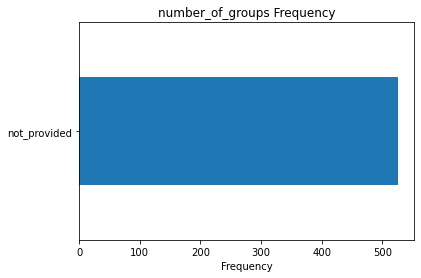

In [26]:
import matplotlib.pyplot as plt
import pandas

fig, ax = plt.subplots()
ea['study_type'].value_counts().plot(ax=ax, kind='barh')
# Add title and axis names
plt.title('study_type Frequency')
plt.xlabel('Frequency')

#
fig, ax = plt.subplots()
ea['has_dmc'].value_counts().plot(ax=ax, kind='barh')
# Add title and axis names
plt.title('has_dmc Frequency')
plt.xlabel('Frequency')
#
fig, ax = plt.subplots()
ea['overall_status'].value_counts().plot(ax=ax, kind='barh')
# Add title and axis names
plt.title('overall_status Frequency')
plt.xlabel('Frequency')
#
fig, ax = plt.subplots()
ea['enrollment_type'].value_counts().plot(ax=ax, kind='barh')
# Add title and axis names
plt.title('enrollment_type Frequency')
plt.xlabel('Frequency')
#
fig, ax = plt.subplots()
ea['number_of_facilities'].value_counts().plot(ax=ax, kind='bar')
# Add title and axis names
plt.title('number_of_facilities Frequency')
plt.xlabel('Frequency')
#
fig, ax = plt.subplots()
ea['number_of_arms'].value_counts().plot(ax=ax, kind='barh')
# Add title and axis names
plt.title('number_of_arms Frequency')
plt.xlabel('Frequency')
#
fig, ax = plt.subplots()
ea['number_of_groups'].value_counts().plot(ax=ax, kind='barh')
# Add title and axis names
plt.title('number_of_groups Frequency')
plt.xlabel('Frequency')
#

In [7]:
ea = pd.read_csv('ExpandedAccess_cleaned_final.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
ea.head()
# run the profile report
profile = ea.profile_report(title='EA Data Profiling Report')
   
# save the report as html file
profile.to_file(output_file="Data_Profiling_EA.html")

<ipython-input-7-6bcc391d9f53>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ea = pd.read_csv('ExpandedAccess_cleaned_final.csv', sep='$$', error_bad_lines=False, index_col=False, dtype='unicode')


In [8]:
ea['country']